#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [2]:
import cv2 ## import cv2
import numpy as np ## import numpy
import matplotlib.pyplot as plt ## import matplotlib pyplot
from sklearn.cluster import KMeans ## import KMeans cluster from sklearn
from scipy.spatial import distance ## import distance from scipy.spatial
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

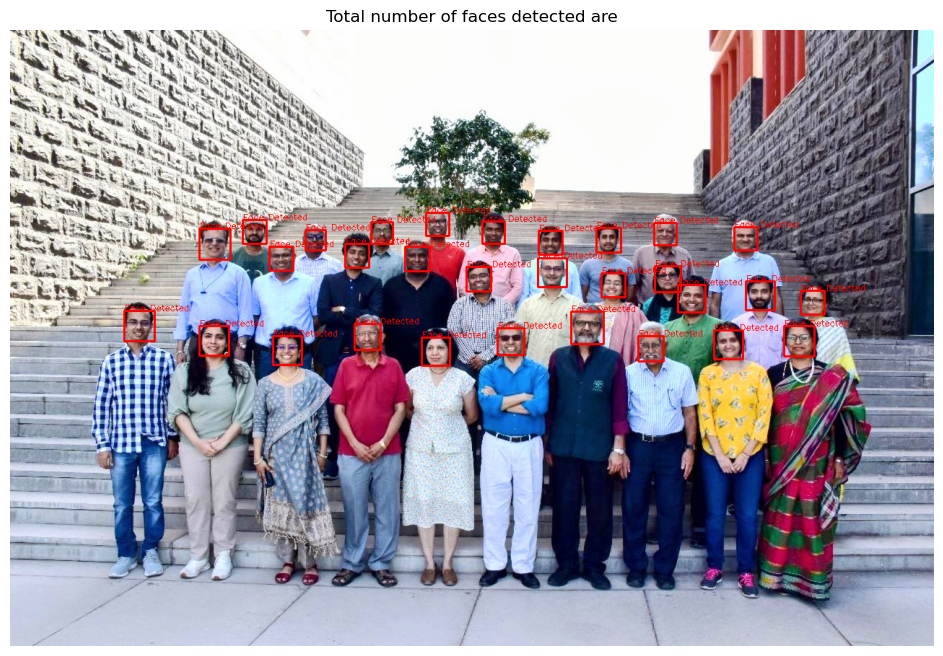

In [4]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread("Plaksha_Faculty.jpg")  
## Convert the image to grayscale
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier('/opt/anaconda3/lib/python3.12/site-packages/cv2/data/haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Face Detected" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.4  ## Font scale factor
font_color = (0,0,255)  ## Text color in BGR format (here, it's red)
font_thickness = 1  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x,y), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis('off')
plt.title("Total number of faces detected are")
plt.show()

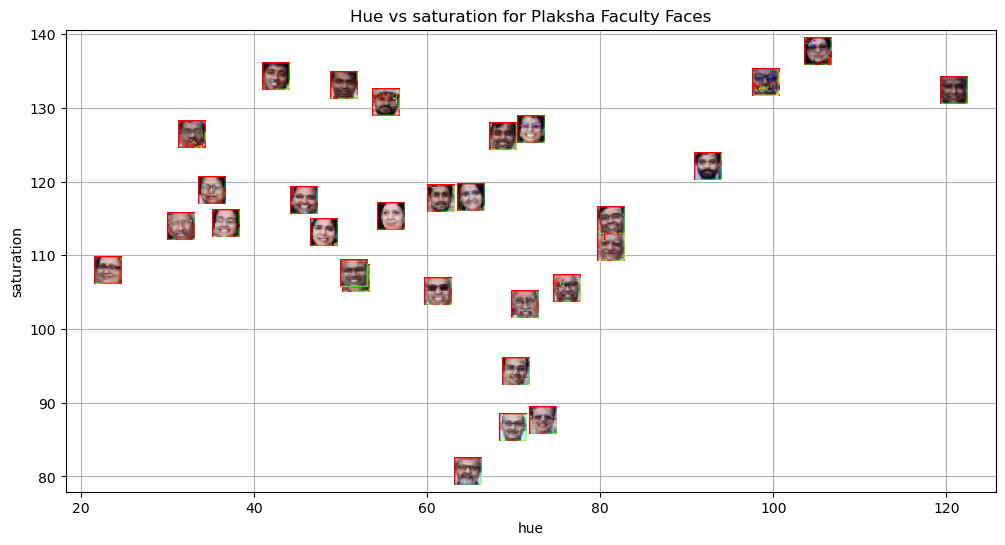

In [12]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

plt.xlabel('hue')## Put x label
plt.ylabel('saturation')## Put y label
plt.title('Hue vs saturation for Plaksha Faculty Faces')## Put title
plt.grid()## Put grid
plt.show()## show the plot

In [14]:
hue_saturation

array([[ 55.28741965, 130.77869605],
       [ 50.40062435, 133.1383975 ],
       [ 32.81777778, 126.50222222],
       [ 81.24973985, 111.1748179 ],
       [ 99.14285714, 133.46045918],
       [ 61.59602076, 117.75519031],
       [ 76.20214844, 105.54492188],
       [ 51.71484375, 106.86425781],
       [ 42.55831038, 134.2892562 ],
       [ 68.76859504, 126.11937557],
       [ 73.38561385,  87.62574365],
       [ 81.22491349, 114.83564014],
       [120.8416955 , 132.48356401],
       [ 36.68870523, 114.43434343],
       [105.13117284, 137.77006173],
       [ 69.959375  ,  86.68125   ],
       [ 51.52525253, 107.6134068 ],
       [ 45.80124654, 117.54709141],
       [ 23.14233242, 108.04591368],
       [ 92.4875    , 122.044375  ],
       [ 55.80999343, 115.27087442],
       [ 31.5470679 , 113.91898148],
       [ 48.02914932, 113.17787032],
       [ 70.26984127,  94.28231293],
       [ 61.29875822, 105.07962016],
       [ 35.10770975, 118.84750567],
       [ 65.06      , 117.910625  ],
 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


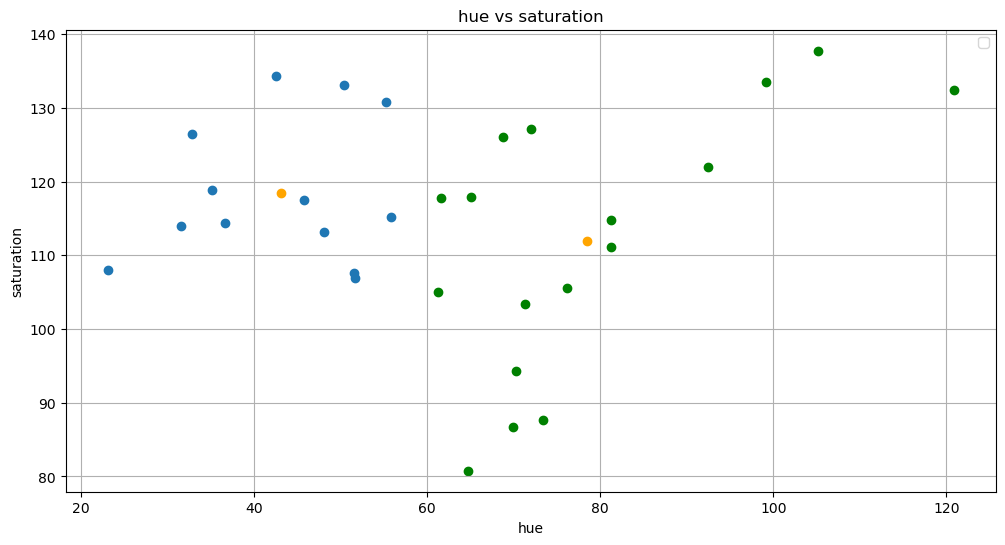

In [16]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1], c='green')

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:,0],cluster_1_points[:,1])

# Calculate and plot centroids
centroid_0 = centroids[0]
centroid_1 = centroids[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0],centroid_0[1], c='orange')
plt.scatter(centroid_1[0],centroid_1[1], c='orange')

plt.xlabel('hue')## Put x label
plt.ylabel('saturation')## Put y label
plt.title('hue vs saturation')## Put title
plt.legend()## Add a legend
plt.grid()## Add grid
plt.show()## Show the plot

In [18]:
hue_saturation

array([[ 55.28741965, 130.77869605],
       [ 50.40062435, 133.1383975 ],
       [ 32.81777778, 126.50222222],
       [ 81.24973985, 111.1748179 ],
       [ 99.14285714, 133.46045918],
       [ 61.59602076, 117.75519031],
       [ 76.20214844, 105.54492188],
       [ 51.71484375, 106.86425781],
       [ 42.55831038, 134.2892562 ],
       [ 68.76859504, 126.11937557],
       [ 73.38561385,  87.62574365],
       [ 81.22491349, 114.83564014],
       [120.8416955 , 132.48356401],
       [ 36.68870523, 114.43434343],
       [105.13117284, 137.77006173],
       [ 69.959375  ,  86.68125   ],
       [ 51.52525253, 107.6134068 ],
       [ 45.80124654, 117.54709141],
       [ 23.14233242, 108.04591368],
       [ 92.4875    , 122.044375  ],
       [ 55.80999343, 115.27087442],
       [ 31.5470679 , 113.91898148],
       [ 48.02914932, 113.17787032],
       [ 70.26984127,  94.28231293],
       [ 61.29875822, 105.07962016],
       [ 35.10770975, 118.84750567],
       [ 65.06      , 117.910625  ],
 

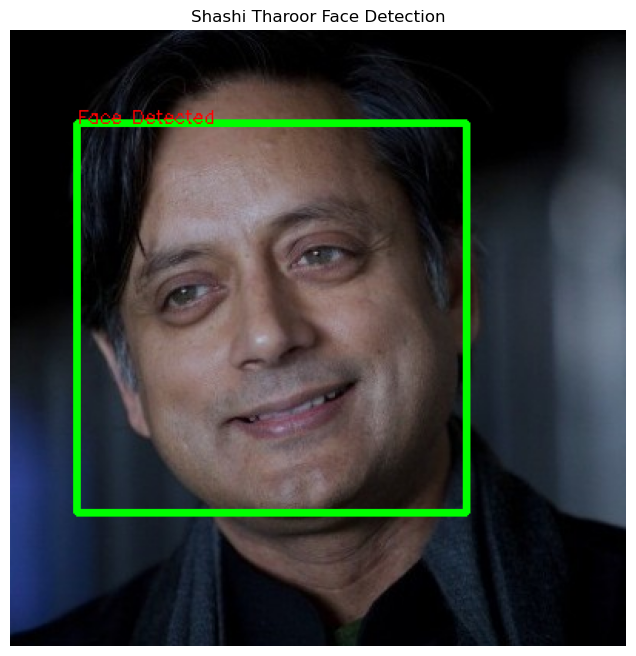

In [20]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")
# Detect face  in the template image after converting it to gray and store it in template_faces
gray_template_img = cv2.cvtColor(template_img,cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(gray_template_img, 1.05, 4, minSize=(25,25))
# Draw rectangles around the detected faces
text = "Face Detected" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.4  ## Font scale factor
font_color = (0,0,255)  ## Text color in BGR format (here, it's red)
font_thickness = 1  ## Thickness of the text

for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv2.putText(template_img, text, (x,y), font, font_scale, font_color, font_thickness)
template_img = cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,8))
plt.imshow(template_img)
plt.axis('off')
plt.title("Shashi Tharoor Face Detection")
plt.show()

In [22]:
hue_saturation

array([[ 55.28741965, 130.77869605],
       [ 50.40062435, 133.1383975 ],
       [ 32.81777778, 126.50222222],
       [ 81.24973985, 111.1748179 ],
       [ 99.14285714, 133.46045918],
       [ 61.59602076, 117.75519031],
       [ 76.20214844, 105.54492188],
       [ 51.71484375, 106.86425781],
       [ 42.55831038, 134.2892562 ],
       [ 68.76859504, 126.11937557],
       [ 73.38561385,  87.62574365],
       [ 81.22491349, 114.83564014],
       [120.8416955 , 132.48356401],
       [ 36.68870523, 114.43434343],
       [105.13117284, 137.77006173],
       [ 69.959375  ,  86.68125   ],
       [ 51.52525253, 107.6134068 ],
       [ 45.80124654, 117.54709141],
       [ 23.14233242, 108.04591368],
       [ 92.4875    , 122.044375  ],
       [ 55.80999343, 115.27087442],
       [ 31.5470679 , 113.91898148],
       [ 48.02914932, 113.17787032],
       [ 70.26984127,  94.28231293],
       [ 61.29875822, 105.07962016],
       [ 35.10770975, 118.84750567],
       [ 65.06      , 117.910625  ],
 

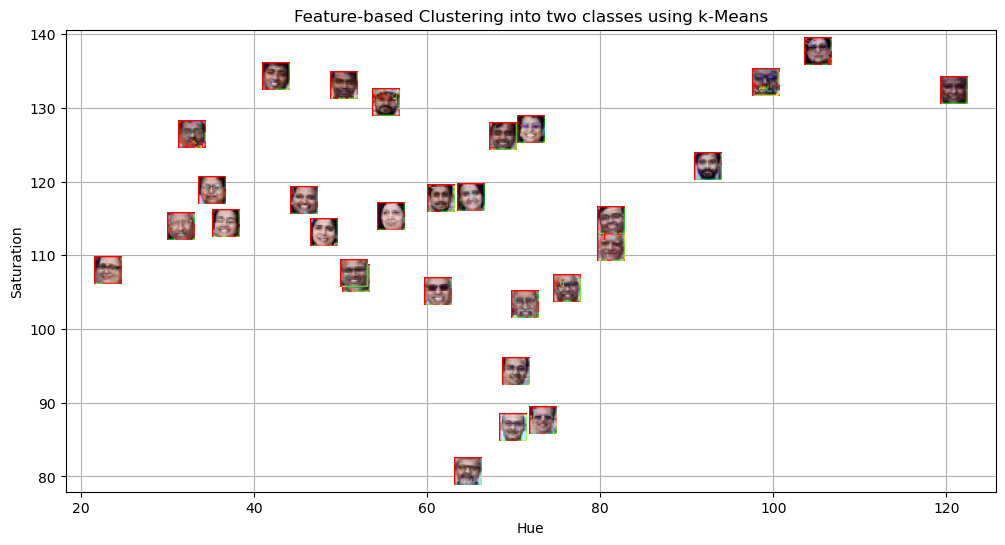

In [30]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
for (x, y, w, h) in template_faces:
    template_face = template_hsv[y:y+h, x:x+w]
    template_hue = np.mean(template_face[:, :, 0])
    template_saturation = np.mean(template_face[:, :, 1])
    break

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_HSV2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Feature-based Clustering into two classes using k-Means")
## Put grid
plt.grid(True)
## show the plot
plt.show()

In [34]:
hue_saturation

array([[ 55.28741965, 130.77869605],
       [ 50.40062435, 133.1383975 ],
       [ 32.81777778, 126.50222222],
       [ 81.24973985, 111.1748179 ],
       [ 99.14285714, 133.46045918],
       [ 61.59602076, 117.75519031],
       [ 76.20214844, 105.54492188],
       [ 51.71484375, 106.86425781],
       [ 42.55831038, 134.2892562 ],
       [ 68.76859504, 126.11937557],
       [ 73.38561385,  87.62574365],
       [ 81.22491349, 114.83564014],
       [120.8416955 , 132.48356401],
       [ 36.68870523, 114.43434343],
       [105.13117284, 137.77006173],
       [ 69.959375  ,  86.68125   ],
       [ 51.52525253, 107.6134068 ],
       [ 45.80124654, 117.54709141],
       [ 23.14233242, 108.04591368],
       [ 92.4875    , 122.044375  ],
       [ 55.80999343, 115.27087442],
       [ 31.5470679 , 113.91898148],
       [ 48.02914932, 113.17787032],
       [ 70.26984127,  94.28231293],
       [ 61.29875822, 105.07962016],
       [ 35.10770975, 118.84750567],
       [ 65.06      , 117.910625  ],
 

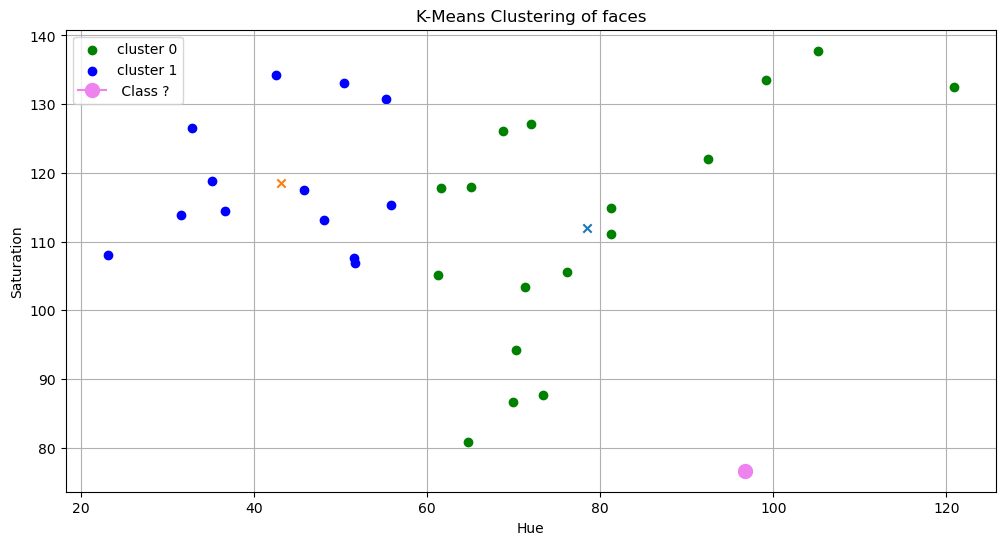

In [36]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1], color='green', label = 'cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1], color='blue', label = 'cluster 1')

# Calculate and plot centroids for both the clusters
# Calculate and plot centroids
centroid_0 = centroids[0]
centroid_1 = centroids[1]

plt.scatter(centroid_0[0], centroid_0[1], marker = 'x') ##plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], marker = 'x')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("K-Means Clustering of faces")
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## Show the plot
plt.show()

                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

#### 2. What are some real-world applications of distance-based classification algorithms? 

#### 3. Explain various distance metrics. 

#### 4. What is the role of cross validation in model performance? 

#### 5. Explain variance and bias in terms of KNN? 

In [41]:
'''
Ans1) There are many diffrence distance metrics that are used. The most common ones are euclidean distance, mahalonobis distance, manhattan
distance, minkowski distance, cosine distance, chebyshev distance and hamming distance. 
Ans2) Distance metrics are used extensively in machine learning, especially to solve problems like object
recognition in images, recommendation systems, fraud detection. Texts, users etc are clustered based on certain features for such problems
using the distance metrics that we have. 
Ans3) Euclidean distance: It's the displacement between two points. Calculating using distance formula ((x1-x2)^2 + (y1-y2)^2)^1/2
Mahalanobis distance: It represents the distance between a point P and a distribution D. The idea is to measure how many standard deviations 
away P is from the mean of D. When the covariance distance is the Identity matrix, the Mahalanobis distance is the same as the Euclidean
distance.
Manhattan Distance: This is the distance between 2 points measured along axes at right angles. This distance metric works well for higher 
dimensional data.
Cosine Distance: It tells us the cos of the angle between the two vectors. Calculated using dot product of the vectors divided by the
product of the magnitude of the vectors. 
Chebyshev Distance: It is defined on a vector space where the distance between two vectors is the greatest of their differences along 
any coordinate dimension. Formula = max(|xa - xb|, |ya - yb|)
Hamming distance: 1 if x = y, 0 if x=/=y
Ans4) After we split our dataset into training and testing, we usually further divide training into different sections so that we can test
our model routinely on our training data itself. This is also helpful because when the model tests on the testing split, its completely new
data that it tests on. When the training data is split into 10 parts, its called 10 fold cross validation.
Ans5) The K in KNN is the number of neigbours we take to evaluate a point. If we increase the value of K, the bias increases because the 
algorithm will always predict the majority class. If we decrease K, the variance increases because the nearby outliers can also influence the
classification.'''

"\nAns1) There are many diffrence distance metrics that are used. The most common ones are euclidean distance, mahalonobis distance, manhattan\ndistance, minkowski distance, cosine distance, chebyshev distance and hamming distance. \nAns2) Distance metrics are used extensively in machine learning, especially to solve problems like object\nrecognition in images, recommendation systems, fraud detection. Texts, users etc are clustered based on certain features for such problems\nusing the distance metrics that we have. \nAns3) Euclidean distance: It's the displacement between two points. Calculating using distance formula ((x1-x2)^2 + (y1-y2)^2)^1/2\nMahalanobis distance: It represents the distance between a point P and a distribution D. The idea is to measure how many standard deviations \naway P is from the mean of D. When the covariance distance is the Identity matrix, the Mahalanobis distance is the same as the Euclidean\ndistance.\nManhattan Distance: This is the distance between 2 p